In [1]:
import geopandas as gpd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
UF = input("Digite o UF: ")
Shape = input("Digite os 2 primeiros digitos do shapefile: ")

Digite o UF: MT
Digite os 2 primeiros digitos do shapefile: 51


# Importando o shapefile

In [3]:
gdf = gpd.read_file('Shapes/'+UF+'/'+Shape+'SEE250GC_SIR.shp')
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 6119 entries, 0 to 6118
Data columns (total 14 columns):
ID            6119 non-null int64
CD_GEOCODI    6119 non-null object
TIPO          6119 non-null object
CD_GEOCODB    2653 non-null object
NM_BAIRRO     2653 non-null object
CD_GEOCODS    6119 non-null object
NM_SUBDIST    798 non-null object
CD_GEOCODD    6119 non-null object
NM_DISTRIT    6119 non-null object
CD_GEOCODM    6119 non-null object
NM_MUNICIP    6119 non-null object
NM_MICRO      6119 non-null object
NM_MESO       6119 non-null object
geometry      6119 non-null object
dtypes: int64(1), object(13)
memory usage: 669.3+ KB


In [4]:
gdf.sort_values('CD_GEOCODI',inplace = True)

# Importando os resultados do universo

In [13]:
dados = pd.read_csv('Planilhas/'+UF+'/CSV/Basico_'+UF+'.csv',sep =';')

In [14]:
dados.rename(columns={'Cod_setor':'CD_GEOCODI'}, inplace=True)
dados.shape

(5929, 13)

In [15]:
dados.head()

,CD_GEOCODI,V001,V002,V003,V004,V005,V006,V007,V008,V009,V010,V011,V012
0,510010205000001,289.0,987.0,"3,42","3,05","740,76","545806,02","820,23","539151,26","429,2","436623,67","803,3","516862,5"
1,510010205000002,242.0,856.0,"3,54","2,34","1053,74","1678212,64","1123,37","1711031,65","542,21","900391,88","907,58","1176187,17"
2,510010205000003,154.0,437.0,"2,84","2,62","1086,1","8356928,51","1122,55","8598067,78","599,52","3571125,68","853,59","4872502,32"
3,510010205000004,50.0,171.0,"3,42","2,37","371,64","71836,52","453,22","50101,98","223,13","75353,31","384,71","67669,58"
4,510010205000005,188.0,502.0,"2,67","2,56","355,44","214554,45","636,41","205255,34","218,15","143902,14","580,83","172665,94"


# Fazendo um merge entre o geodataframe e o dataframe de dados do universo

In [16]:
gdf['CD_GEOCODI']= pd.to_numeric(gdf['CD_GEOCODI'])

In [17]:
df = pd.merge(gdf,dados, on='CD_GEOCODI')

In [18]:
df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 5929 entries, 0 to 5928
Data columns (total 26 columns):
ID            5929 non-null int64
CD_GEOCODI    5929 non-null int64
TIPO          5929 non-null object
CD_GEOCODB    2623 non-null object
NM_BAIRRO     2623 non-null object
CD_GEOCODS    5929 non-null object
NM_SUBDIST    790 non-null object
CD_GEOCODD    5929 non-null object
NM_DISTRIT    5929 non-null object
CD_GEOCODM    5929 non-null object
NM_MUNICIP    5929 non-null object
NM_MICRO      5929 non-null object
NM_MESO       5929 non-null object
geometry      5929 non-null object
V001          5920 non-null float64
V002          5920 non-null float64
V003          5920 non-null object
V004          5920 non-null object
V005          5920 non-null object
V006          5920 non-null object
V007          5896 non-null object
V008          5896 non-null object
V009          5929 non-null object
V010          5929 non-null object
V011          5912 non-null object
V012       

In [19]:
del gdf
del dados

Text(0.5,1,'MT')

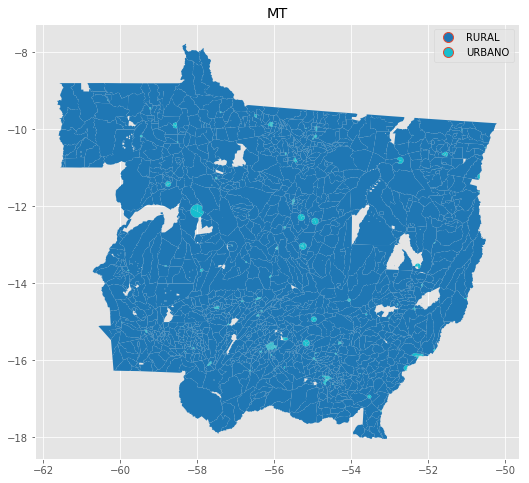

In [20]:
plt.style.use('ggplot')
df.plot(column = 'TIPO',figsize = (17,8),legend = True)
plt.title(UF)

# Utilizando a projeção de Albers para calcular as áreas

In [21]:
df['AREA'] = df.to_crs({'proj': 'aea'}).geometry.area/10**6

# Importando as regiões urbanas definidas pelo estudo da EMBRAPA em 2015

In [22]:
areas_urbanas_br_15 = gpd.read_file('Embrapa/areas_urbanas_br_15.shp')

In [23]:
areas_urbanas_br_15['Area'] = areas_urbanas_br_15.to_crs({'proj': 'aea'}).geometry.area/10**6

In [24]:
areas_urbanas_df_15 = areas_urbanas_br_15[areas_urbanas_br_15['UF']==UF]
del areas_urbanas_br_15

In [25]:
areas_urbanas_df_15.head()

,Municipio,UF,Area_Urb,Geocodigo,geometry,Area
276,Santa Rita do Trivelato,MT,1.650,5107768.0,POLYGON ((-55.27452320614454 -13.8063434395971...,1.650326
648,ItanhangÃ¡,MT,5.975,5104542.0,POLYGON ((-56.63279056058282 -12.2265876638553...,5.974430
2474,ItaÃºba,MT,2.399,5104559.0,POLYGON ((-55.2511850724344 -11.01003251598991...,2.399091
2601,Lambari D'Oeste,MT,1.376,5105234.0,POLYGON ((-58.01206871938063 -15.3187136028153...,1.376450
3606,RibeirÃ£o Cascalheira,MT,4.674,5107180.0,POLYGON ((-51.85991995905686 -12.9562776376323...,4.673480


In [26]:
areas_urbanas_df_15.rename(columns={'Geocodigo':'CD_GEOCODM'}, inplace=True)
areas_urbanas_df_15['CD_GEOCODM']=areas_urbanas_df_15['CD_GEOCODM'].apply(lambda x: int(x))
areas_urbanas_df_15.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 141 entries, 276 to 4232
Data columns (total 6 columns):
Municipio     141 non-null object
UF            141 non-null object
Area_Urb      141 non-null float64
CD_GEOCODM    141 non-null int64
geometry      141 non-null object
Area          141 non-null float64
dtypes: float64(2), int64(1), object(3)
memory usage: 7.7+ KB


In [27]:
df.fillna('0',inplace = True)

# Visualizando as distribuições de Moradias, Moradores e área 

/home/alan/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/alan/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Nº de Moradias no MT')

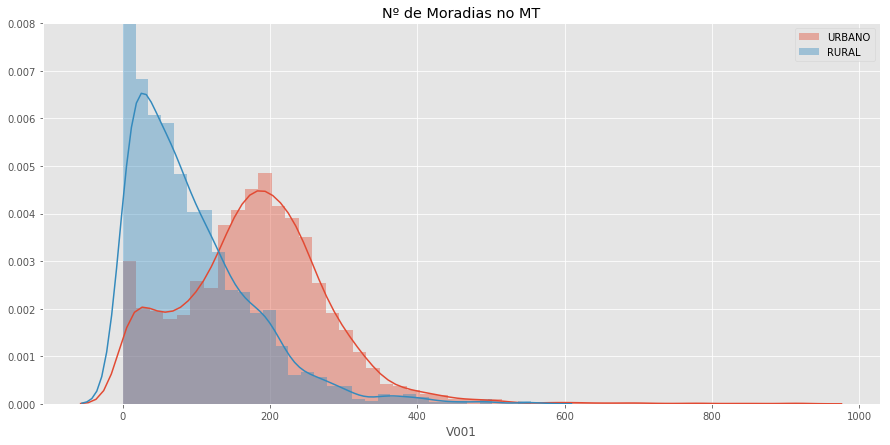

In [28]:
plt.style.use('ggplot')
df['V001'] = pd.to_numeric(df['V001'])
df['V002'] = pd.to_numeric(df['V002'])
fig = plt.figure(figsize = (15,7))
sns.distplot(df[df['TIPO'] =='URBANO']['V001'])
sns.distplot(df[df['TIPO']=='RURAL']['V001'])
plt.legend(['URBANO','RURAL'])
plt.ylim((0,0.008))
plt.title('Nº de Moradias no '+UF)

## Descrição do Número de Moradias por setor censitários urbanos e rurais

In [29]:
print('RURAL','\n',df[df['TIPO']=='RURAL']['V001'].describe())
print('URBANO','\n',df[df['TIPO']=='URBANO']['V001'].describe())

RURAL 
 count    1719.000000
mean       93.142525
std        82.111370
min         0.000000
25%        30.000000
50%        73.000000
75%       134.000000
max       554.000000
Name: V001, dtype: float64
URBANO 
 count    4210.000000
mean      179.329454
std       101.416743
min         0.000000
25%       113.000000
50%       180.000000
75%       237.750000
max       919.000000
Name: V001, dtype: float64


/home/alan/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/alan/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


(0, 0.05)

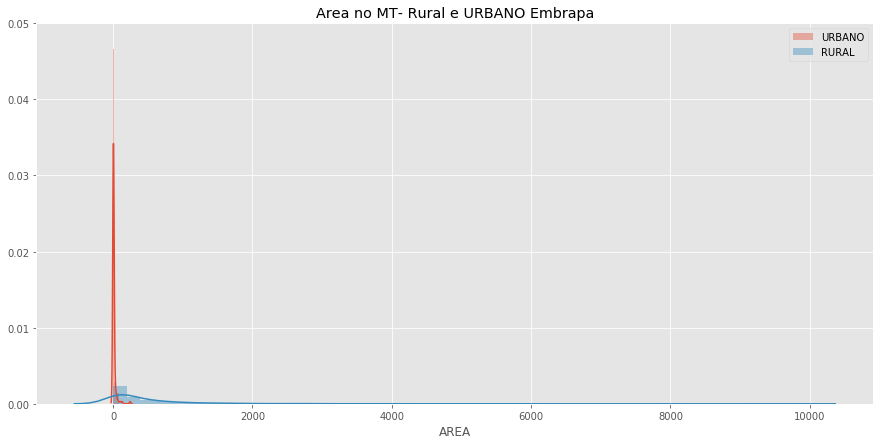

In [30]:
fig = plt.figure(figsize = (15,7))

sns.distplot(areas_urbanas_df_15['Area'])
plt.legend(['URBANO'])
sns.distplot(df[df['TIPO']=='RURAL']['AREA'])
plt.legend(['URBANO','RURAL'])
plt.title('Area no ' +UF+'- Rural e URBANO Embrapa')
plt.ylim((0,0.05))

In [31]:
df['Densidade Moradias'] = df.V001/df.AREA

/home/alan/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/alan/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Densidade de moradias')

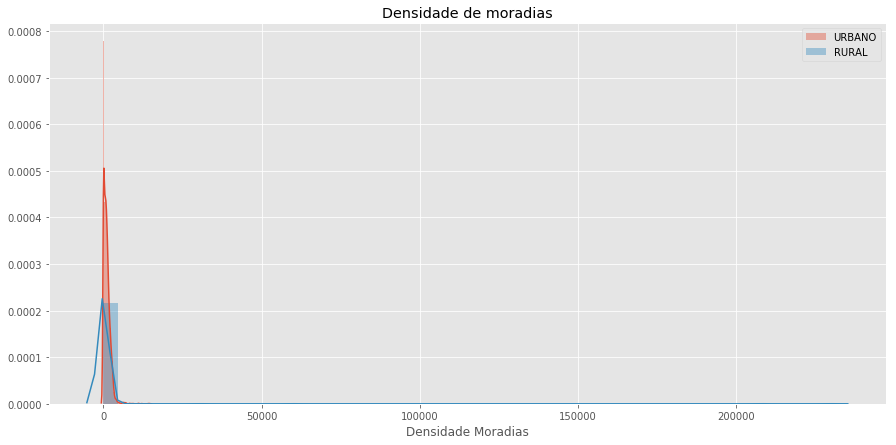

In [32]:
plt.style.use('ggplot')
fig = plt.figure(figsize = (15,7))

sns.distplot(df[df['TIPO']=='URBANO']['Densidade Moradias'])
sns.distplot(df[df['TIPO']=='RURAL']['Densidade Moradias'])
plt.legend(['URBANO','RURAL'])
plt.title('Densidade de moradias')
#plt.ylim((0,0.05))

In [33]:
print('RURAL','\n',df[df['TIPO']=='RURAL']['Densidade Moradias'].describe())
print('URBANO','\n',df[df['TIPO']=='URBANO']['Densidade Moradias'].describe())

RURAL 
 count      1719.000000
mean        338.606563
std        7649.555226
min           0.000000
25%           0.097811
50%           0.337542
75%           1.255101
max      229987.917887
Name: Densidade Moradias, dtype: float64
URBANO 
 count     4210.000000
mean      1113.154784
std       1060.341735
min          0.000000
25%        346.060553
50%        909.172972
75%       1598.341354
max      14639.546202
Name: Densidade Moradias, dtype: float64


In [34]:
df[(df['TIPO']=='RURAL')&(df['Densidade Moradias']>df['Densidade Moradias'].quantile(q=0.5))].describe()

,ID,CD_GEOCODI,V001,V002,AREA,Densidade Moradias
count,37.000000,3.700000e+01,37.000000,37.000000,37.000000,37.000000
mean,21266.270270,5.105327e+14,153.567568,547.783784,0.190202,15137.199911
std,1626.683361,2.331772e+11,135.295467,475.115023,0.185415,50619.628716
min,18278.000000,5.100201e+14,6.000000,46.000000,0.000029,480.601638
25%,20731.000000,5.104609e+14,37.000000,209.000000,0.059647,562.216088
50%,21447.000000,5.106174e+14,138.000000,435.000000,0.175213,824.725527
75%,22299.000000,5.107065e+14,188.000000,666.000000,0.264164,1466.087711
max,23457.000000,5.107909e+14,495.000000,1785.000000,1.015903,229987.917887


## Descrição da área por setor censitários urbanos e rurais

In [35]:
print('URBANO','\n',areas_urbanas_df_15['Area'].describe())
print('RURAL','\n',df[df['TIPO']=='RURAL']['AREA'].describe())

URBANO 
 count    141.000000
mean      11.381232
std       26.068115
min        0.744366
25%        2.263945
50%        4.676957
75%        9.248445
max      244.124625
Name: Area, dtype: float64
RURAL 
 count    1719.000000
mean      503.512651
std       822.405897
min         0.000029
25%        66.423063
50%       235.879906
75%       610.488208
max      9811.111957
Name: AREA, dtype: float64


/home/alan/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/alan/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


(0, 0.003)

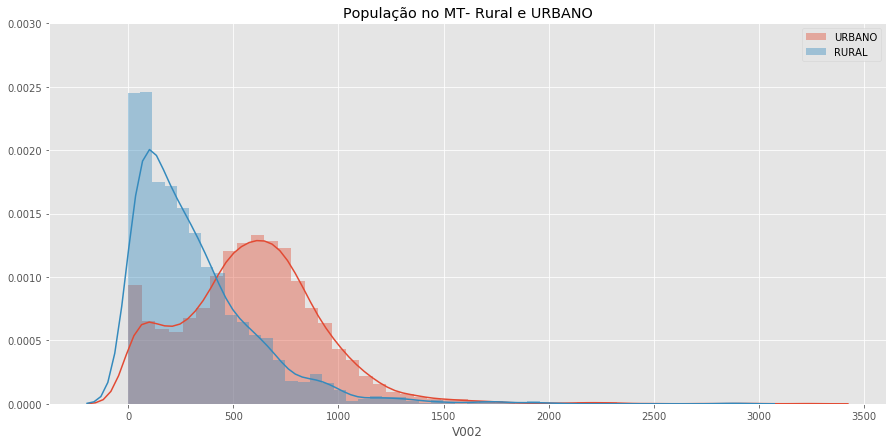

In [36]:
fig = plt.figure(figsize = (15,7))

sns.distplot(df[df['TIPO']=='URBANO']['V002'])
plt.legend(['URBANO'])
sns.distplot(df[df['TIPO']=='RURAL']['V002'])
plt.legend(['URBANO','RURAL'])
plt.title('População no '+UF+'- Rural e URBANO')
plt.ylim((0,0.003))

## Descrição do Número de moradores por setor censitários urbanos e rurais

In [37]:
print('RURAL','\n',df[df['TIPO']=='RURAL']['V002'].describe())
print('URBANO','\n',df[df['TIPO']=='URBANO']['V002'].describe())

RURAL 
 count    1719.000000
mean      315.329843
std       290.110579
min         0.000000
25%       104.000000
50%       243.000000
75%       430.000000
max      2877.000000
Name: V002, dtype: float64
URBANO 
 count    4210.000000
mean      586.550356
std       339.697089
min         0.000000
25%       360.250000
50%       585.000000
75%       781.000000
max      3231.000000
Name: V002, dtype: float64


# Definindo os limites para filtrar os setores censitários 

In [38]:
max_area = areas_urbanas_df_15['Area'].mean() 
min_pop =  df[df['TIPO']=='URBANO']['V002'].mean()
min_mor =  df[df['TIPO']=='URBANO']['V001'].mean()
min_densidade_moradias = df[df['TIPO']=='URBANO']['Densidade Moradias'].quantile(q = 0.5)

In [39]:
scrcu = df[(df.TIPO=='RURAL')&(df.V001 >= min_mor)&(df.AREA <= max_area)&(df.V002>= min_pop)\
           &(df['Densidade Moradias']>= min_densidade_moradias)]

In [40]:
scrcu.describe()

,ID,CD_GEOCODI,V001,V002,AREA,Densidade Moradias
count,6.000000,6.000000e+00,6.000000,6.000000,6.000000,6.000000
mean,22549.000000,5.107030e+14,355.333333,1270.833333,0.273799,1397.408814
std,1058.467194,1.284048e+11,106.526366,387.465310,0.104135,513.774044
min,20734.000000,5.104609e+14,241.000000,841.000000,0.159011,996.896795
25%,22171.250000,5.106850e+14,262.000000,943.750000,0.181251,1080.715213
50%,22805.500000,5.107487e+14,349.000000,1257.000000,0.273494,1223.196080
75%,23363.250000,5.107909e+14,438.250000,1548.500000,0.357925,1458.193523
max,23440.000000,5.107909e+14,492.000000,1785.000000,0.400225,2371.416337


Text(0.5,1,'SCRCU - Por Município')

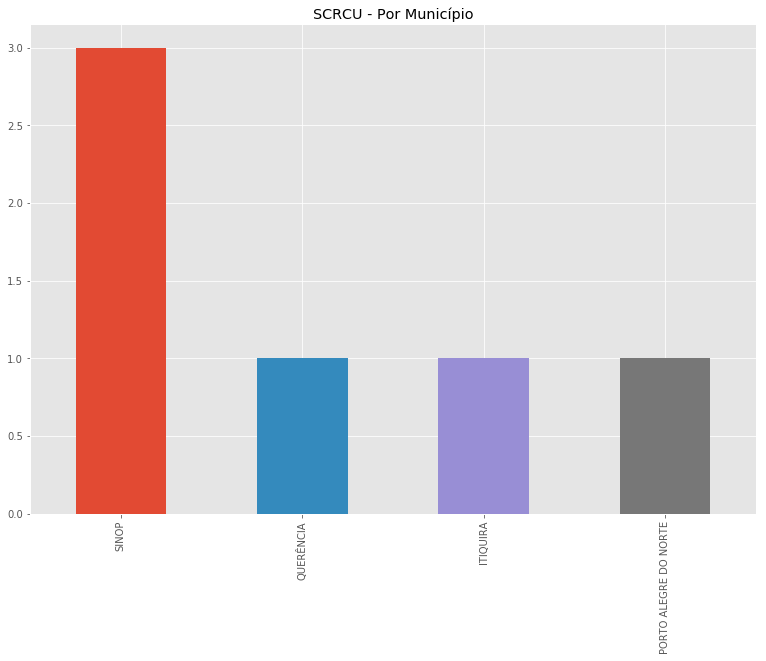

In [41]:
plt.style.use('ggplot')
scrcu.NM_MUNICIP.value_counts().plot.bar(figsize = (13,9))
plt.title('SCRCU - Por Município')

# Visualizando as areas urbanas no estado - Sobrepondo scrcu e as regioes urbanas definidas pelo estudo da embrapa

/home/alan/.local/lib/python3.6/site-packages/geopandas/plotting.py:393: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  "'color'.", UserWarning)


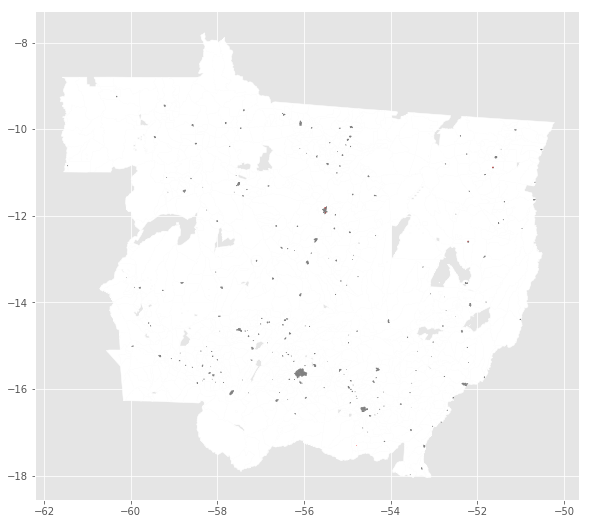

In [42]:
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize = (15,9))
ax.set_aspect('equal')
df.plot(ax=ax, color='white', edgecolor='white')
areas_urbanas_df_15.plot(ax=ax, color='gray', edgecolor='gray')
scrcu.plot(ax=ax,column = 'CD_GEOCODI',color = 'red',edgecolor='red')

In [43]:
areas_urbanas_df_15.rename(columns={'Area':'AREA'},inplace = True)

In [44]:
fonte = np.zeros(areas_urbanas_df_15.shape[0])
areas_urbanas_df_15['FONTE'] = fonte

In [45]:
fonte_1 = np.zeros(scrcu.shape[0])+1
scrcu['FONTE'] = fonte_1

/usr/lib/python3/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [46]:
regioes_urbanas_df = scrcu[['geometry','FONTE']].append(areas_urbanas_df_15[['geometry','FONTE']])

In [47]:
regioes_urbanas_df.head()

,geometry,FONTE
2475,POLYGON ((-54.78996158707497 -17.3017393852076...,1.0
3783,POLYGON ((-51.64371152372009 -10.8801789603695...,1.0
3961,POLYGON ((-52.21853586873839 -12.5901349095962...,1.0
4907,"POLYGON ((-55.5089717980068 -11.8217264151224,...",1.0
4971,"POLYGON ((-55.5032431984637 -11.932339966532, ...",1.0


In [48]:
def fonte(x):
    if x == 0:
        return 'EMBRAPA'
    return 'ALAN'
regioes_urbanas_df['FONTE'] = regioes_urbanas_df['FONTE'].apply(fonte) 

In [49]:
regioes_urbanas_df.to_file(driver = 'ESRI Shapefile',filename ='regioes_urbanas_'+UF+'.shp')

In [50]:
import mplleaflet
f, ax = plt.subplots(1,figsize = (15,7))
regioes_urbanas_df[regioes_urbanas_df['FONTE']=='ALAN'].plot(ax=ax,color = 'red',edgecolor='red')
regioes_urbanas_df[regioes_urbanas_df['FONTE']=='EMBRAPA'].plot(ax=ax,color = 'purple',edgecolor='purple')

mplleaflet.display(fig=f,crs=regioes_urbanas_df.crs)